<a href="https://colab.research.google.com/github/ssweta3seal/HotelBookingAnalysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Abstract
This data set describes data with hotel demand data. One of the hotels is a resort hotel and the other is a city hotel. The dataset share the same structure, with 32 variables describing the 40,060 observations of resort hotel and 79,330 observations of city hotel.The distance between these two locations is 280 km and both locations border on the north atlantic. Each observation represents a hotel booking. The dataset comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017.
We will perform exploratory data analysis with python to get insight from the data.

# ANSWERED QUESTIONS
<b>Hotel wise Analysis
1. Which hotel is mostly booked by customers?
2. How long does people stay in the hotels?
3. How does lead time effects cancelation of hotel ?

<b>Booking Analysis
4. Which is the most common customer_type ?
5. Which country has the highest booking ?
6. Which hotel have high cancelation ration ?
7. what are the effects of deposit on bookings ?
8. Is assigned room type the causes for high cancelation?

<b>Market Analysis
9. Which segment of the market usually has the least number on the waiting list?
10. Which segment of the Distribution_channel usually has the least number on  the waiting list?
11. Which hotel is mostly preferred by Distributors ?

<b>Time Analysis
12. How average daily rate (adr) changes with different months ?
13. What is the busiest month of the year?
14. Which is most preferred weekdays or weekends ?
15. How average daily rate (adr) changes with Customer Type ?
16. what is the chances of repeated guest cancelling the booking ?
17. which segemnt of distribution channel have highest bookings and cancelations?
18. which market_segment have highest bookings and cancelations?
19. Which type of rooms are mostly reserved ?
20. Which type of rooms are mostly assigned ?
21. which hotel has most special request?


In [ ]:
#importing different mosdules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import plotly.express as px
import matplotlib.ticker as mtick

pd.options.display.max_columns = None

In [ ]:
#mounted the drive
from google.colab import drive                                                                                                                                                                                                                                                                                                                                                                                                                                                                
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the dataset
hotel_data=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/EDA Capstone project/Hotel Bookings.csv')

In [ ]:
#viewing the data
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [ ]:
hotel_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


In [ ]:
#checking the columns and rows
hotel_data.shape

(119390, 32)

In [ ]:
#checking the data
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#checking the data types
hotel_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Checking the values of different column

In [ ]:
hotel_data['arrival_date_year'].unique().tolist()


[2015, 2016, 2017]

In [ ]:
hotel_data['meal'].unique().tolist()

['BB', 'FB', 'HB', 'SC', 'Undefined']

In [ ]:
hotel_data['market_segment'].unique().tolist()


['Direct',
 'Corporate',
 'Online TA',
 'Offline TA/TO',
 'Complementary',
 'Groups',
 'Undefined',
 'Aviation']

In [ ]:
hotel_data['distribution_channel'].unique().tolist()

['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']

# **Data Cleaning**

In [ ]:
#dropping unnecessary column
hotel_data=hotel_data.drop(columns = ["company","reservation_status_date","arrival_date_week_number"])


The columns “agent” and “company” have a high percentage of missing values. As these columns won’t be relevant for our analysis, we can delete them.

In [ ]:
#checkimg the null values
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [ ]:
#checking total null values
hotel_data.isnull().sum().sort_values()

hotel                                 0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
is_repeated_guest                     0
total_of_special_requests             0
distribution_channel                  0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
arrival_date_month                    0
arrival_date_year                     0
lead_time                             0
is_canceled                           0
market_segment                        0


In [ ]:
#dropping nullvalues
hotel_data=hotel_data.dropna()

In [ ]:
hotel_data.shape

(102894, 29)

In [ ]:
#recheckimg the data
hotel_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
#the statistical overview of the data
hotel_data.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000
mean,0.390314,111.740092,2016.156977,15.786771,0.978181,2.589655,1.899926,0.111231,0.007697,0.014034,0.077215,0.024365,0.201780,86.545532,2.619579,104.679911,0.053035,0.605458
std,0.487823,107.681013,0.706117,8.794042,1.003991,1.905941,0.490891,0.411982,0.097089,0.117631,0.758185,0.435759,0.624954,110.714259,18.797440,50.021697,0.225359,0.799342
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,169.000000,2017.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


Analysing the data

dependednt variables and dependent variables

# **Hotel wise Analysis**

*Which hotel is mostly booked by customers?*

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

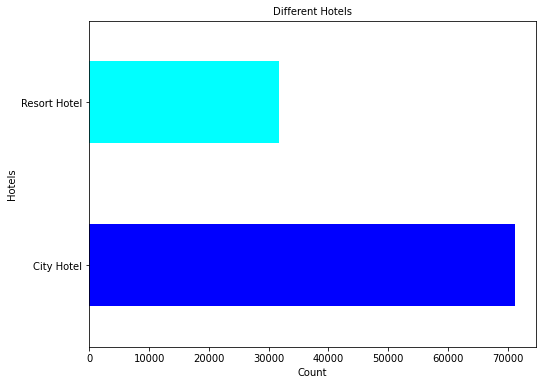

In [ ]:
#checking the demand of hotel
plt.figure(figsize=[8,6])

hotel_data.groupby('hotel')['hotel'].count().plot.barh(color=['Blue','Cyan'])

plt.title('Different Hotels', fontsize=10)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Hotels', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


Around 58% bookings are for City hotel and 42% bookings are for Resort hotel.

How long does people stay in the hotels?

In [ ]:
#storing the the cancelation values
Resort = hotel_data.loc[(hotel_data["hotel"] == "Resort Hotel") & (hotel_data["is_canceled"] == 0)]
City = hotel_data.loc[(hotel_data["hotel"] == "City Hotel") & (hotel_data["is_canceled"] == 0)]

In [ ]:
#length of stay
Resort["total_nights"] = Resort["stays_in_weekend_nights"] + Resort["stays_in_week_nights"]
City["total_nights"] = City["stays_in_weekend_nights"] + City["stays_in_week_nights"]

num_nights_res = list(Resort["total_nights"].value_counts().index)
num_bookings_res = list(Resort["total_nights"].value_counts())
rel_bookings_res = Resort["total_nights"].value_counts() / sum(num_bookings_res) *100 # convert to percent

num_nights_cty = list(City["total_nights"].value_counts().index)
num_bookings_cty = list(City["total_nights"].value_counts())
rel_bookings_cty = City["total_nights"].value_counts() / sum(num_bookings_cty) *100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


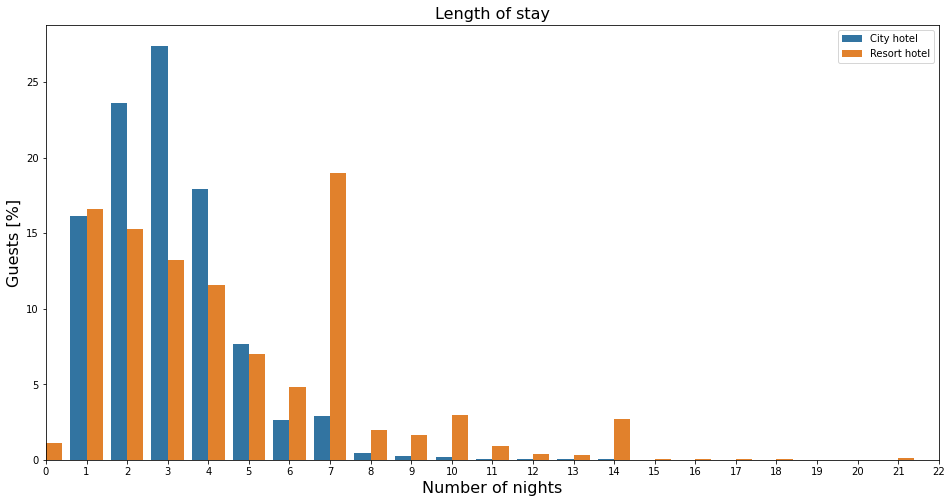

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

How does lead time effects cancelation of hotel?

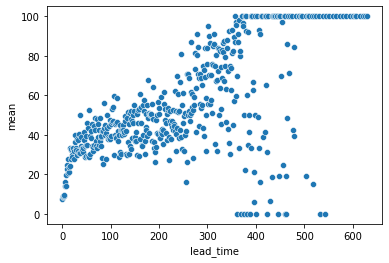

In [ ]:
#comparing lead time with cancelation 
a = hotel_data.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100)

Text(0.5, 1.0, 'Cancelation vs Booking')

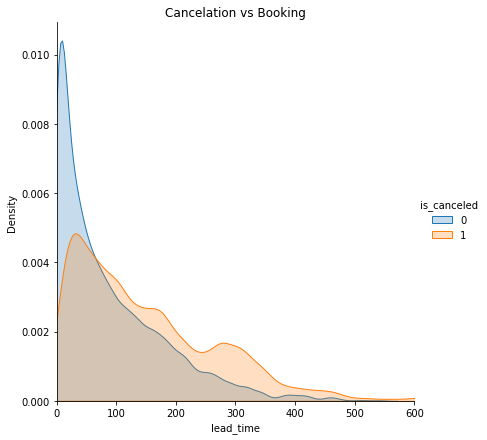

In [ ]:
#Relationship of lead time with cancellation  (booking was canceled (1) or not canceleld (0))
(sns.FacetGrid(hotel_data, hue = 'is_canceled',
             height = 6,
             xlim = (0,600))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend())
plt.title('Cancelation vs Booking')



 Lead time has a positive correlation with cancellation.
 

 Generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred

In [ ]:
#total people stay
hotel_data['total_guests']=hotel_data['adults']+hotel_data['children']+hotel_data['babies']


Text(0, 0.5, 'Number of Bookings')

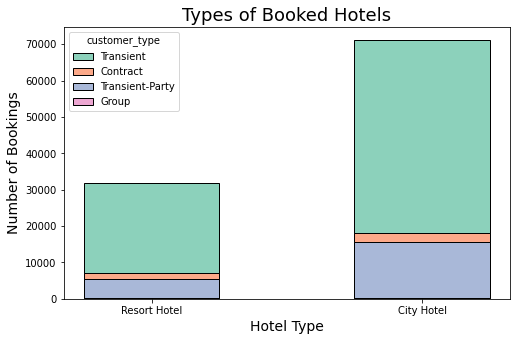

In [ ]:
#hotel preference of customer
plt.subplots(figsize = (8,5))
sns.histplot(data = hotel_data, x = "hotel",palette = "Set2", hue = "customer_type", multiple = "stack", shrink = 0.5)
plt.title("Types of Booked Hotels", fontsize = 18)
plt.xlabel("Hotel Type", fontsize = 14)
plt.ylabel("Number of Bookings", fontsize = 14)

# **Booking Analysis**

Which country has the highest booking?

In [ ]:
#booking of top 20 countries

top_countries = list(hotel_data.country.value_counts().head(20).index)

fig = px.histogram(hotel_data[hotel_data.country.isin(top_countries)],
             x='country',
             color='is_canceled',
             facet_col='hotel')
fig.update_layout(bargap=0.1)
fig.update_layout(title='Bookings by countries (Top 20)')

fig.show()

There are 174 countries amongst which Portugal made the highest bookings.
City hotel is most;y prfered in Portugal,France,Deutsche, whereas Resort hotel is preferd by Portugal ,Great Britain.

what are the effects of deposit on bookings ?



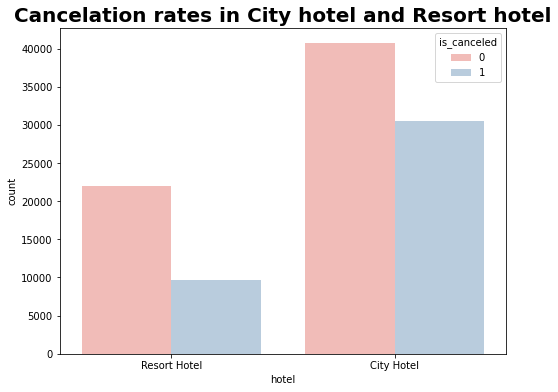

In [ ]:
#checking the cancelation rate of each hotel
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel',hue="is_canceled", data=hotel_data,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

Most bookings were in city hotel
Cancelations in Resort hotel is less compared to city hotel

Text(0.5, 1.0, 'Type of deposit  effecting Cancelation')

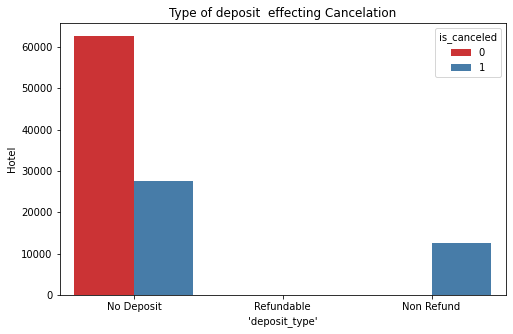

In [ ]:
#effects of deposits on cancelation
d = hotel_data['deposit_type'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.countplot(x='deposit_type', hue='is_canceled', data=hotel_data[hotel_data['deposit_type'].isin(d.index)],palette='Set1')
plt.xlabel("'deposit_type'")
plt.ylabel("Hotel")
plt.title("Type of deposit  effecting Cancelation")

It is clearly visible that the the direct customers is contributing maximum to the hotel revenue

It is clearly visible that the the direct customers is contributing maximum to the hotel revenue

In [ ]:
#effects of type of deposits
deposit = hotel_data.groupby("deposit_type").mean()
deposit

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests
deposit_type,,,,,,,,,,,,,,,,,,,
No Deposit,0.306331,96.184359,2016.183473,15.806209,1.027789,2.663722,1.907799,0.126622,0.008768,0.015312,0.033214,0.027745,0.228112,90.822937,1.700224,106.968593,0.060394,0.689318,2.043189
Non Refund,0.995688,223.638077,2015.965022,15.650615,0.618192,2.050711,1.842996,0.000559,0.000000,0.004712,0.394905,0.000080,0.011340,55.296518,9.137119,88.190422,0.000000,0.001278,1.843555
Refundable,0.500000,192.354167,2016.375000,14.729167,1.541667,3.812500,1.937500,0.020833,0.000000,0.041667,0.000000,0.000000,0.333333,189.625000,32.354167,99.646875,0.041667,0.416667,1.958333




*   Non Refund deposits double lead_time than No deposit.
*   previous_cancellations is 10x higher for Non Refund deposits
*   required_car_parking_spaces is almost zero for Non Refund Deposits
*   special requests are very rare


There was no deposit for City hotel where as Resorts had some deposits. No deposit may lead to cancel the bookings

It is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

Text(0.5, 1.0, 'Rates paid for canceled and not canceled reservations')

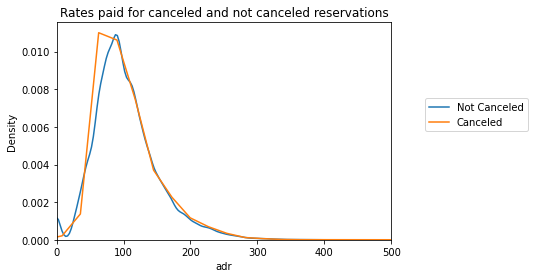

In [ ]:

plt.xlim(0, 500)
sns.kdeplot(data = hotel_data[hotel_data['is_canceled'] == 0], x = 'adr', label = 'Not Canceled') 
sns.kdeplot(data = hotel_data[hotel_data['is_canceled'] == 1], x = 'adr', label = 'Canceled')
plt.legend(loc=(1.1,0.5))
plt.title('Rates paid for canceled and not canceled reservations')

Is assigned room type the causes for high cancelation?

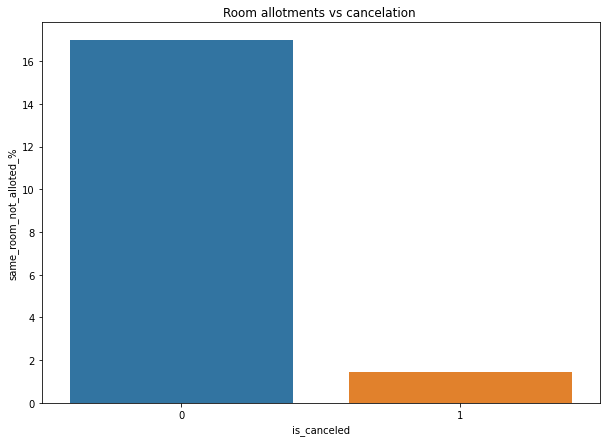

In [ ]:
#room allotment effecting cancelation
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

hotel_data['same_room_not_alloted'] = hotel_data.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = hotel_data.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.title('Room allotments vs cancelation ')
plt.show()

From the above we can conclude that the room allotment factors is not effecting the bookings.

## **Market Analysis**

Which segment of the market usually has the least number on the waiting list?

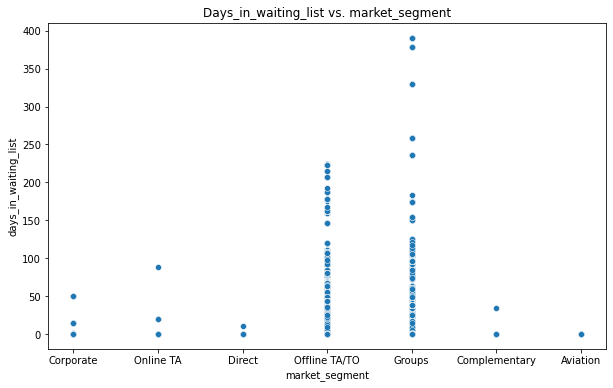

In [ ]:
#checked the waiting time for each segment
fig,ax=plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x="market_segment", y="days_in_waiting_list", data=hotel_data)
ax.set_title("Days_in_waiting_list vs. market_segment")
ax.set_xlabel("market_segment")
ax.set_ylabel('days_in_waiting_list')
plt.show()


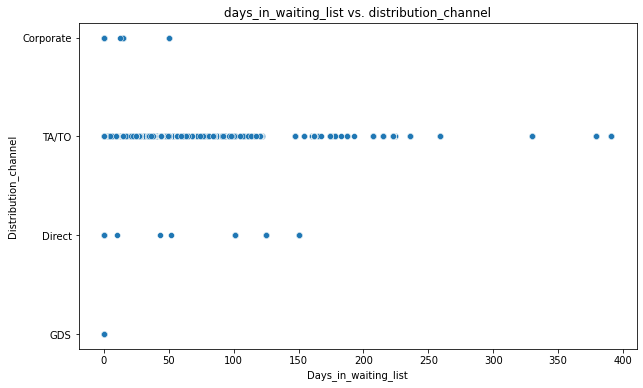

In [ ]:
#checked the waiting time for each distribution channel
fig,ax=plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x="days_in_waiting_list", y="distribution_channel", data=hotel_data,palette='Set3')
ax.set_title("days_in_waiting_list vs. distribution_channel")
ax.set_ylabel("Distribution_channel")
ax.set_xlabel('Days_in_waiting_list')
plt.show()

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.
While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

Text(0.5, 1.0, 'Hotel Preference by Distributors')

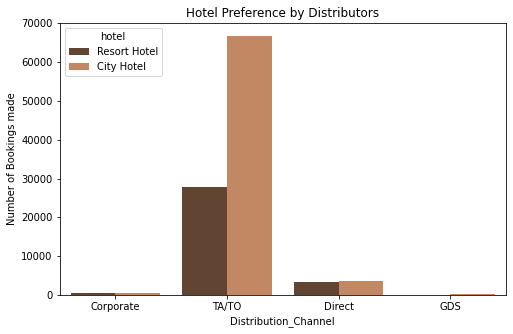

In [ ]:
#hotel preference by customer type

plt.figure(figsize=(8,5))
sns.countplot(x='distribution_channel', hue='hotel', data=hotel_data,palette='copper')
plt.xlabel("Distribution_Channel")
plt.ylabel("Number of Bookings made")
plt.title("Hotel Preference by Distributors")

City hotel has more revenue generating deals by direct and TA/TO channel

# **Time Analysis**

What is the busiest month of the year?

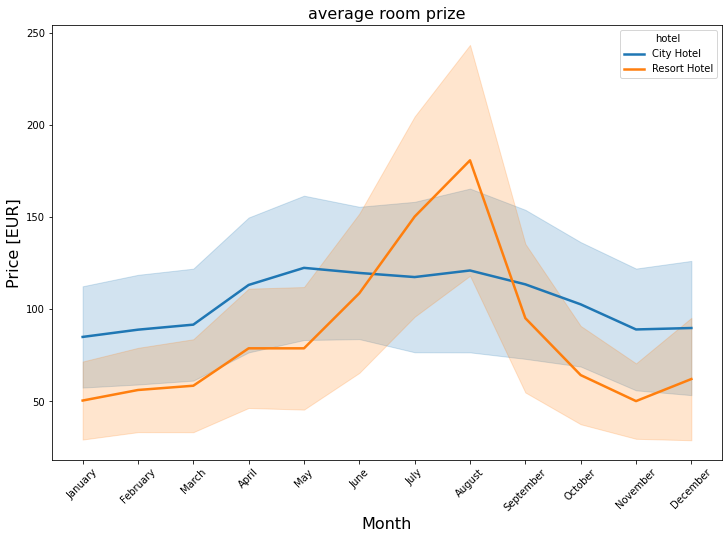

In [ ]:
#monthly demand
full_data_guests = hotel_data.loc[hotel_data["is_canceled"] == 0]

room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], 
                                                          categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("average room prize", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

The City hotel has more guests during july and august, when the prices are also highest.
Guest numbers for the Resort hotel go down slighty from September. Both hotels have the fewest guests during the winter even when price is lowest.



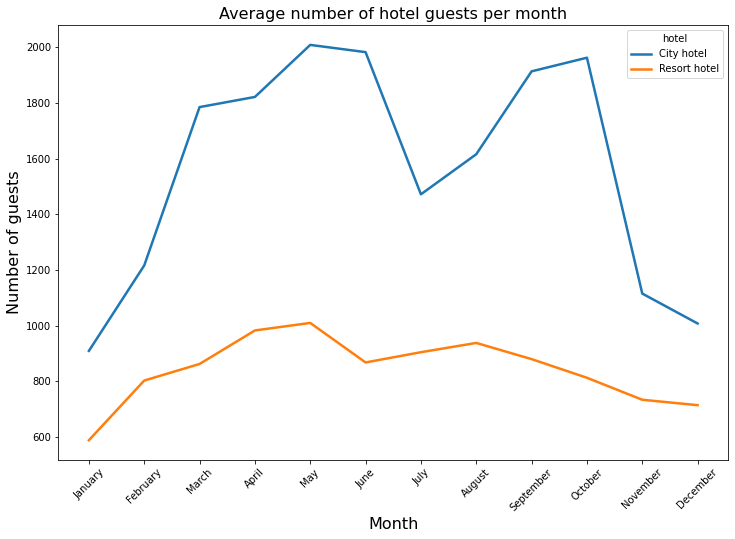

In [ ]:
#monthly revenue earned by each hotel
Resort_guests_monthly = Resort.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = City.groupby("arrival_date_month")["hotel"].count()
Resort_guest_data = pd.DataFrame({"month": list(Resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(Resort_guests_monthly.values)})
City_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([Resort_guest_data,City_guest_data], ignore_index=True)
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()


This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel  is more during March, April & May.
Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

In [ ]:
hotel_data_Notcanceled = hotel_data[hotel_data['is_canceled'] == 0]

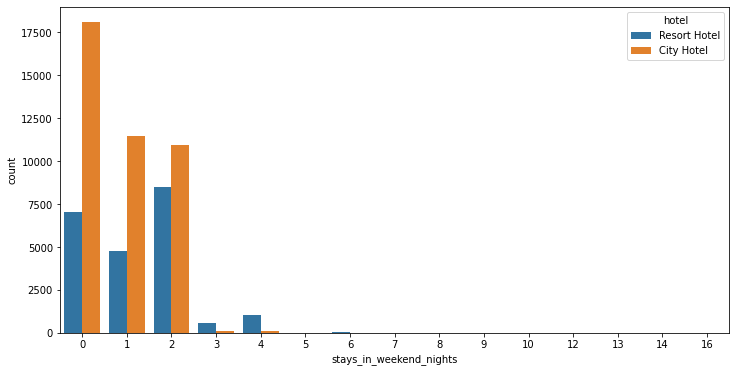

In [ ]:
#weekend stay
plt.figure(figsize = (12,6))
sns.countplot(data=hotel_data_Notcanceled,x='stays_in_weekend_nights',hue='hotel')

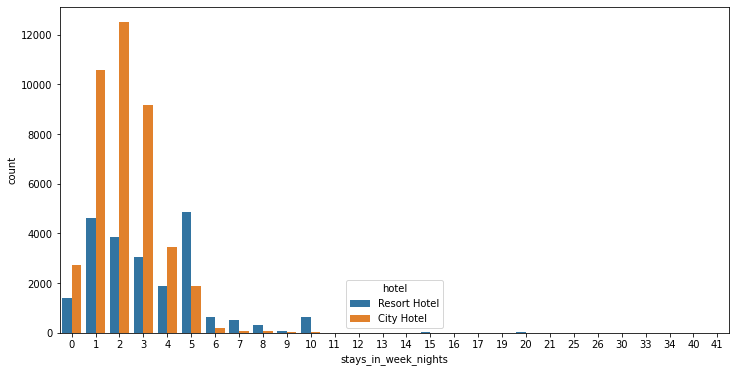

In [ ]:
#weekdat stays
plt.figure(figsize = (12,6))
sns.countplot(data=hotel_data_Notcanceled,x='stays_in_week_nights',hue='hotel')

People mostly prefer city hotel for weekend stays and resort hotels for longer stays

Text(0.5, 0, 'Type of Customer')

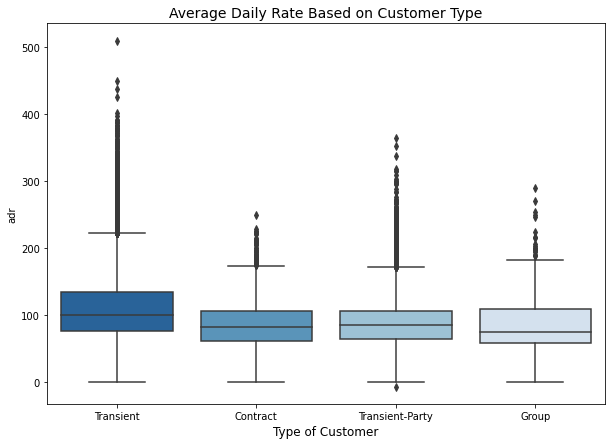

In [ ]:
#revenue contribution of customer segment
fig = plt.subplots(figsize = (10,7))
c= sns.boxplot(data = hotel_data[hotel_data["adr"]<1000], x = "customer_type", y = "adr", palette = "Blues_r")
c.set_title("Average Daily Rate Based on Customer Type", fontsize = 14)
c.set_xlabel("Type of Customer", fontsize = 12)

 what is the chances of repeated guest cancelling the booking ?
 

Text(0.5, 1.0, 'Cancellations by repeated guests')

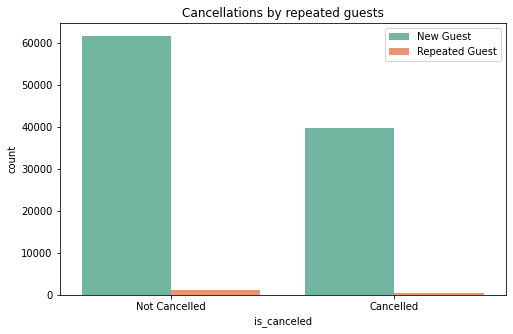

In [ ]:
#cancelation ny repeated guests
plt.figure(figsize=(8,5))
sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = hotel_data, palette='Set2')
plt.legend(['New Guest', 'Repeated Guest'])
plt.xticks(ticks=[0,1], labels=['Not Cancelled', 'Cancelled'])
plt.title("Cancellations by repeated guests")

which segemnt has highest bookings and cancelations?

Text(0.5, 1.0, 'Bookings by distribution channel')

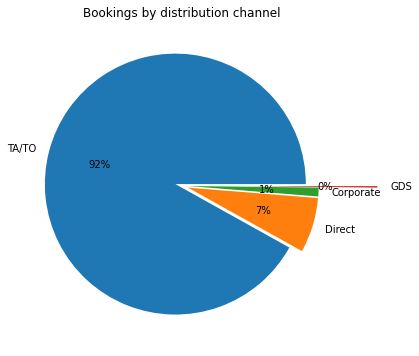

In [ ]:
#checking booking ratio of distribution channel
d = hotel_data['distribution_channel'].value_counts()
plt.figure(figsize=(8,6))
p = plt.pie(d, labels=d.index, explode=[0.05,0.05,0.05,0.5],autopct="%.0f%%")
plt.title("Bookings by distribution channel")

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

Text(0.5, 0, 'Distribution Channel')

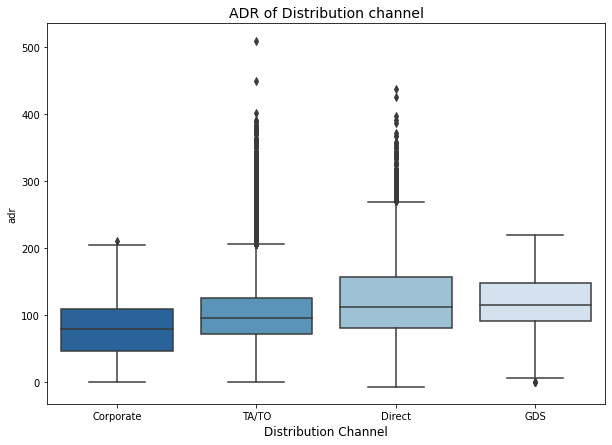

In [ ]:
#revenue contribution of distribution chanel
fig = plt.subplots(figsize = (10,7))
c= sns.boxplot(data = hotel_data[hotel_data["adr"]<1000], x = "distribution_channel", y = "adr", palette = "Blues_r")
c.set_title("ADR of Distribution channel", fontsize = 14)
c.set_xlabel("Distribution Channel", fontsize = 12)

It is observed that direct customers are having the highest contribution towards revenue

Text(0.5, 1.0, 'Bookings by market_segment')

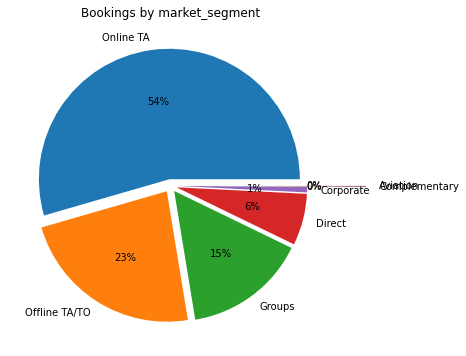

In [ ]:
#checking booking ratio of the market segment
d = hotel_data['market_segment'].value_counts()
plt.figure(figsize=(8,6))
p = plt.pie(d, labels=d.index, explode=[0.05,0.05,0.05,0.05,0.05,0.5,0.5],autopct="%.0f%%")
plt.title("Bookings by market_segment")

Text(0.5, 1.0, 'Cancelation by distribution channel')

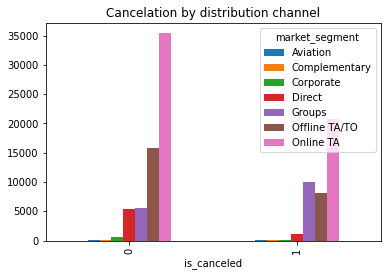

In [ ]:
#checking cancelation rate of the market segment
d=hotel_data.groupby(['is_canceled','market_segment']).size()
d=d.unstack()
d.plot(kind='bar')
plt.title("Cancelation by distribution channel")

Groups segment has cancellation rate around 50%. Offline TA/TO (Travel Agents/Tour Operators) and Online TA has cancellation rate more than 33%. It is surprising that the cancellation rate in these segments is high despite the application of a deposit. The fact that cancellations are made collectively like group reservations has high cancellation rate. It is interesting to note that direct segment has cancellation rate less than 20%.

Text(0.5, 0, 'Market Segment')

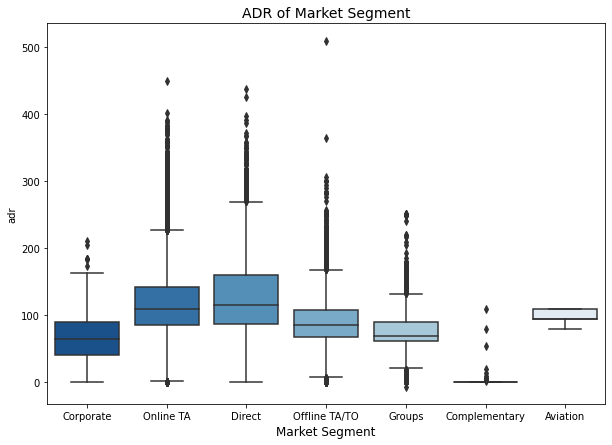

In [ ]:
#revenue contribution of market segment
fig = plt.subplots(figsize = (10,7))
c= sns.boxplot(data = hotel_data[hotel_data["adr"]<1000], x = "market_segment", y = "adr", palette = "Blues_r")
c.set_title("ADR of Market Segment", fontsize = 14)
c.set_xlabel("Market Segment", fontsize = 12)

It is observed that direct customers are having the highest contribution towards revenue

Text(0.5, 1.0, 'Types of Rooms reserved')

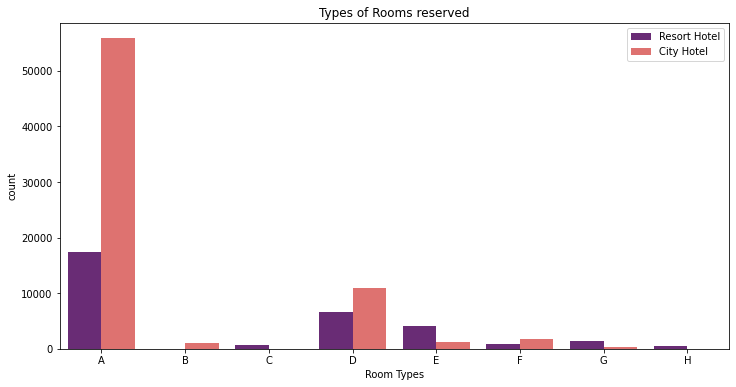

In [ ]:
rooms=sorted(hotel_data['reserved_room_type'].unique())
#reserved room type
plt.figure(figsize = (12,6))
sns.countplot(x='reserved_room_type', hue='hotel', data=hotel_data, order=rooms,palette='magma')
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Types of Rooms reserved")

Text(0.5, 1.0, 'Types of Rooms Assigned')

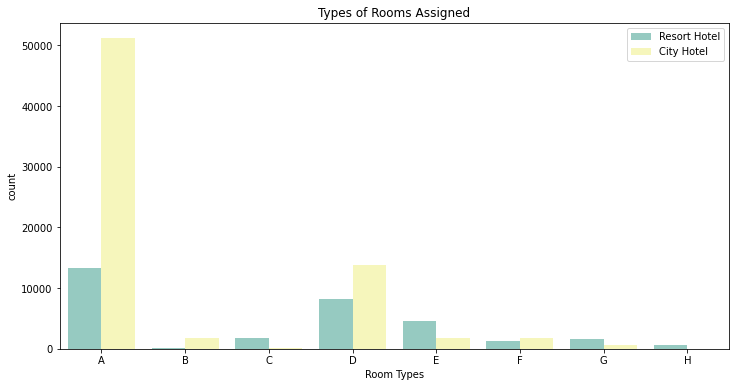

In [ ]:
#type of room assigned
plt.figure(figsize = (12,6))
sns.countplot(x='assigned_room_type', hue='hotel', data=hotel_data, order=rooms,palette='Set3')
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Types of Rooms Assigned")

We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

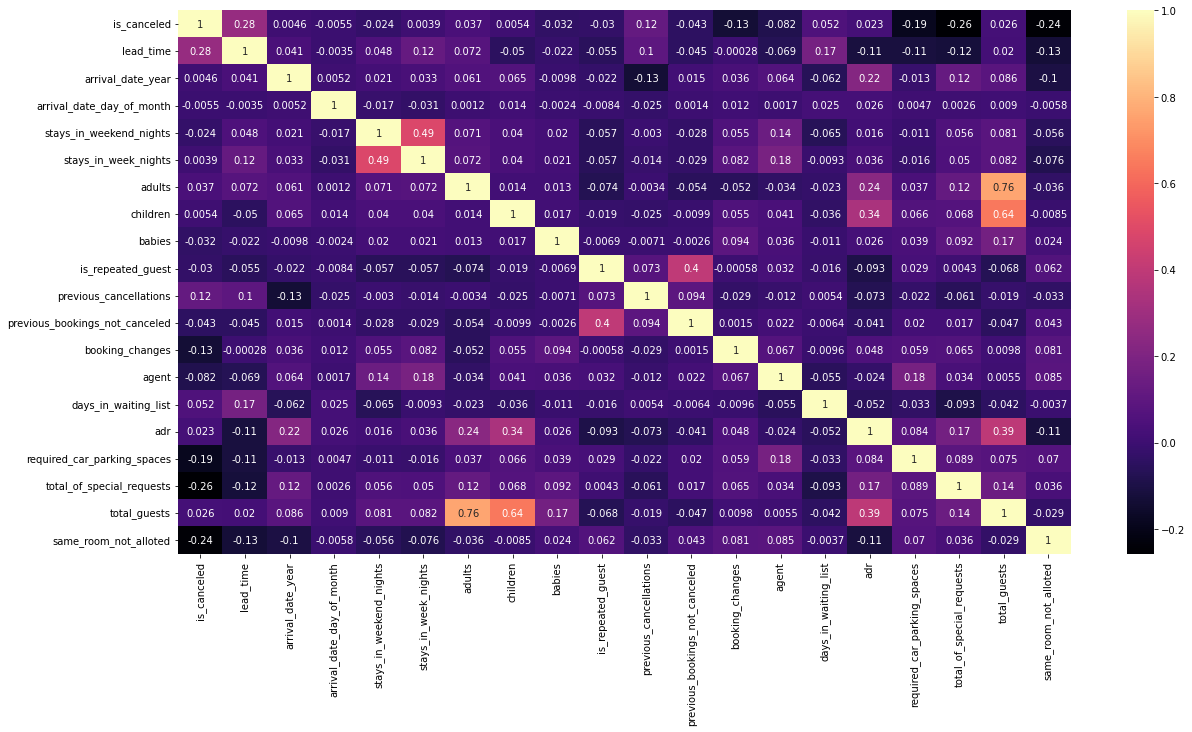

In [ ]:
plt.figure(figsize=(20,10))
c=hotel_data.corr()
sns.heatmap(c,cmap='magma',annot=True)



From the above heatmap we found that few column like same_room_not_allotted, no_of_special_requests,car_parking spaces,booking_changes are negatively corelated like these column will not effect the bookings.
Whereas lead_time and previous_cancelation,stay in weekend is highly correlated,which means that this columns effect my bookings .
If we dug deep we will see that adults and children are positively corelated with stay in weekend hence we can conclude that people staying in wekekdn  are mostly family.


# **Conclusion:**

Firstly, higher lead time has higher chance of cancellation. Also, history of previous cancellations increases chances of cancellation.

Secondly, The City hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower. Thus, customers can get good deal on bookings in July and August in city hotel.

Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest. Thus, these months should be avoided for bookings.

Thirdly, Broadly, Arpil to August is the peak season of bookings. Both hotels have the fewest guests during the winter.

Fourthly, No deposit cancellations are high compared to other categories but these should not be discouraged per se as bookings in this category are also very high compared to non refundable type bookings.

Fifthly, cancellations are high when done through agents compared to direct bookings. Hotels need to do marketing and give special incentives for direct bookings as these may establish personal one to one relationships promoting customer loyalty